# Programming Lab 2 - Machine Learning Experiment

***
##### CS 434 - Dating Mining and Machine Learning
##### Oregon State University-Cascades
***

In [0]:
name = 'Taylor Mallory'

# Instructions

## Section Code
* Complete the sections below. 

* Make sure to use the current date column as the predictor (`-1`).

* Where appropriate, make sure your code is within the function for the task.

* You may add helper functions (if needed)

* Comment your work: either within the code or as text blocks above.

## Lab Report
* Answer the questions with a thoughtful **paragraph**. You may include graphs, tables, and/or code blocks with `print` as you need.

* Your responses should convey your understanding of the process, your results, and your analysis of those results.

* Answers not placed in the correct section of the Report will not be graded.

* Half-assed answers may receive half a grade.

* Replace the *Lorem ipsum* text with your answers with the Response section.

* *Take pride in visual appeal of your answers.* Format your responses nicely. Review the markup tutorial in `Lecture 00-Getting Started`.


***
# Load packages 
***

Add the packages you need here (not below!)

In [0]:
import enum 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
assert name != '<replace with your name>'

***
# Dataset
***

In this Lab, you will build a linear regressive model to predict the number of `Covid19` cases and deaths by country.

In [0]:
cases_url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv'
deaths_url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv'

> These datasets update continuously.

### Some lists of countries

In [0]:
north_america = ['US', 'Canada', 'Mexico']
south_america = ['Brazil', 'Argentina', 'Chile', 'Venezuela']             
europe = ['Spain', 'France', 'Germany', 'United Kingdom']
africa = ['Egypt', 'South Africa', 'Nigeria', 'Kenya']
asia = ['Russia', 'Korea, South', 'Japan', 'India']
# add other lists as you like

***
# Task 1 - Load, clean, and transform data
***

### 1.1 Load data into `df_cases`

In [5]:
# load the dataset into a dataframe
df_cases = pd.read_csv(cases_url)
df_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,4,4,4,4,4,4,4,4,4,4,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


### 1.2 Load data into `df_deaths`

In [6]:
# load the dataset into a dataframe
df_deaths = pd.read_csv(deaths_url)
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 1.3 Drop latitude and longitude from both dataframes

In [7]:
# drop latitude and longitude
df_cases.drop('Lat',axis=1, inplace=True)
df_cases.drop('Long',axis=1, inplace=True)
df_deaths.drop('Lat',axis=1, inplace=True)
df_deaths.drop('Long',axis=1, inplace=True)
df_cases

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092
1,NaN,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609
2,NaN,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811
3,NaN,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717
4,NaN,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,4,4,4,4,4,4,4,4,4,4,4,4
261,NaN,Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


### 1.4 Combine regions by country

Combine all states/territories for each country into a single sum for that country. For example, we combine the 11 provinces into one count for `Canada`.

* Use [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) by `'Country/Region'`
* Use the [`agg`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) function to `'sum'`

In [8]:
# combine regions into same country
df_cases = df_cases.groupby(['Country/Region']).agg("sum")
df_deaths = df_deaths.groupby(['Country/Region']).agg("sum")
df_deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,4
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


> This action will reduce the number of rows and eliminate the `'Province/State'` column. 

### 1.5 Display data

In [9]:
# display df_cases
df_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,35,38,38,39,41,44,47,48,52,59,59,59,84,91,98,109,116,119,134,161,194,217,237,254,261,263,263,267,268,290,308,308,374,374,402,418,437,449,466
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1


In [10]:
# display deaths
df_deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,4
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Self Check

In [0]:
assert len(df_cases)==185 and len(df_deaths)==185

***
# Task 2 - Explore Data
***

**Note** : this dataset updates daily. When asked to use 'most recent day', use the *last* column in the dataframes.  **Do not hardcode specific dates!**

### 2.1 Describe `df_cases` for today

In [12]:
# describe df_cases most recent day
df_cases.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.00000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,3.000000,3.535135,5.086486,7.751351,11.448649,15.821622,30.151351,33.329730,44.508108,53.659459,65.070270,90.740541,107.464865,129.145946,149.378378,166.454054,185.897297,200.648649,217.027027,231.145946,242.172973,244.437838,326.313514,361.540541,373.135135,384.994595,395.989189,406.140541,408.859459,411.875676,415.237838,424.713514,426.80000,430.059459,434.627027,439.935135,447.275676,454.659459,464.924324,477.670270,...,784.891892,843.789189,905.156757,981.481081,1065.416216,1161.194595,1311.189189,1471.394595,1645.983784,1821.367568,2044.491892,2259.681081,2527.854054,2862.654054,3206.978378,3571.313514,3892.648649,4229.129730,4635.064865,5040.405405,5477.437838,5922.691892,6355.983784,6753.967568,7141.248649,7546.443243,7998.940541,8460.962162,8959.600000,9381.891892,9917.410811,10296.421622,10682.113514,11113.805405,11634.794595,12109.135135,12528.421622,12978.924324,13363.556757,13843.475676
std,40.287688,47.271074,67.633789,103.362557,152.543112,211.504049,405.005232,447.496726,598.504278,720.611914,874.189955,1222.603155,1449.486795,1742.903411,2017.354951,2248.722202,2507.712587,2706.504894,2928.166427,3113.785492,3263.177285,3290.592646,4403.402047,4878.557342,5029.625967,5184.006356,5325.235141,5455.883849,5485.887881,5519.532771,5554.263276,5660.889588,5662.41828,5678.536739,5716.265582,5746.683616,5779.049282,5804.029629,5837.254867,5881.682866,...,6171.911567,6255.360736,6352.497306,6468.917109,6607.885878,6797.006807,7102.780426,7481.990583,7942.622538,8421.241915,9089.272087,9774.794195,10698.401642,11963.827870,13295.590390,14772.177496,16164.852600,17691.710483,19579.131374,21467.116353,23645.707325,25948.255258,28332.014930,30374.761188,32483.285919,34701.766764,37056.396221,39549.712154,42059.988364,44284.845492,46708.985555,48586.491194,50590.484288,52740.756726,55234.204398,57642.988488,59948.460336,62036.256143,63915.908179,66762.333419
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

### 2.2 Describe `df_deaths` for today

In [13]:
# describe df_deaths most recent day
df_deaths.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,0.091892,0.097297,0.140541,0.227027,0.302703,0.443243,0.708108,0.718919,0.924324,1.151351,1.400000,1.956757,2.302703,2.659459,3.048649,3.427027,3.886486,4.356757,4.897297,5.475676,6.016216,6.043243,7.410811,8.232432,9.005405,9.567568,10.097297,10.848649,11.470270,12.145946,12.167568,13.286486,13.345946,14.210811,14.637838,14.972973,15.210811,15.524324,15.897297,16.194595,...,29.210811,31.454054,34.810811,38.518919,42.729730,47.205405,53.335135,61.075676,70.124324,79.194595,89.216216,100.675676,114.491892,129.567568,147.016216,165.686486,183.378378,203.145946,227.610811,255.043243,286.410811,317.783784,349.227027,374.994595,403.054054,442.902703,477.551351,516.329730,554.237838,586.545946,616.756757,645.897297,681.054054,725.345946,777.372973,831.540541,862.210811,892.124324,918.837838,956.664865
std,1.249865,1.323386,1.911558,3.087901,4.117202,6.028760,9.631312,9.778354,12.572170,15.660071,19.042059,26.540950,31.246308,36.098713,41.392249,46.538744,52.788061,59.184423,66.536564,74.403357,81.755499,82.123107,100.650136,111.825393,122.265059,129.837386,137.042485,147.261963,155.569153,164.537644,164.536302,179.607540,179.752182,190.778365,195.923881,199.745611,201.878202,205.115796,208.577337,211.160188,...,253.807364,260.831862,275.199556,291.330271,309.879767,335.349689,361.916601,401.208575,453.382398,501.702628,552.051477,612.747228,681.376445,753.054178,840.727076,931.937089,1015.781375,1109.723490,1209.572638,1319.987969,1445.263337,1574.710693,1703.307480,1809.148384,1926.160141,2091.193577,2236.557608,2402.482044,2570.294212,2720.623909,2851.089462,2983.690955,3150.869707,3358.761201,3647.911001,3919.077399,4065.532687,4214.820028,4337.268402,4539.029569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

### 2.3 Function to graph country counts

In [0]:
# for the dataframe, plot a line for each country
def graph_countries(df, country_lst, title):
  count = []
  for i in country_lst:
    plt.plot(df.loc[i])
  plt.legend([i for i in country_lst])
  plt.title(title)
  plt.show()

Compare different countries

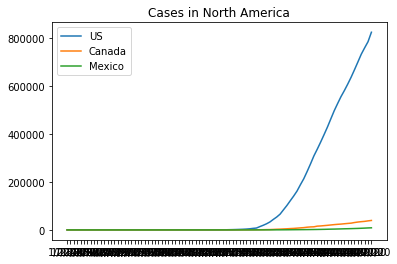

In [15]:
graph_countries(df_cases, north_america, 'Cases in North America')
# graph_countries(df_cases, south_america, 'Cases in South America')
# graph_countries(df_cases, europe, 'Cases in Europe')
# graph_countries(df_cases, africa, 'Cases in Africa')
# graph_countries(df_cases, asia, 'Cases in Asia')

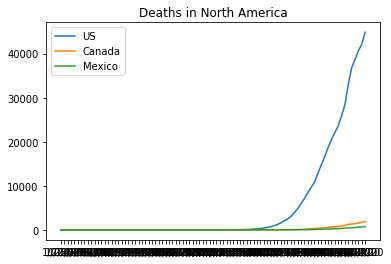

In [16]:
graph_countries(df_deaths, north_america, 'Deaths in North America')
# graph_countries(df_deaths, south_america, 'Deaths in South America')
# graph_countries(df_deaths, europe, 'Deaths in Europe')
# graph_countries(df_deaths, africa, 'Deaths in Africa')
# graph_countries(df_deaths, asia, 'Deaths in Asia')

*** 
# Task 3 - Feature Engineering
*** 

### 3.1 `Log10` transform all numeric columns





We need to lift the value off the zero floor to avoid `-inf` values.
* add `1` to each value before `log10` transform

In [17]:
# log10 transform all int64 columns
t = [[1,2,3],[4,5,6]]
tdf = pd.DataFrame(t)
def log10_transform(df):
  df = np.log10(df.select_dtypes(include='int64').apply(lambda x: x + 1))
  return df

print(log10_transform(tdf))

         0         1         2
0  0.30103  0.477121  0.602060
1  0.69897  0.778151  0.845098


> This function will be called by the experiment below

### 3.2 Drop days 

We want to be able to predict one than one day in advance.  Complete the function to drop `num_days` from the end of the data frame while keeping the last column to use as our predictor.  

For example, given the column series:

$$\texttt{4/14, 4/15, 4/16, 4/17, 4/18, 4/19, 4/20}$$

`drop_days(df_cases, 3)` would return a dataframe with columns:

$$\texttt{4/14, 4/15, 4/16, 4/20}$$

having dropped $\texttt{4/17, 4/18, 4/19}$, the last `num_days=3` columns that are not the last column.

> `num_days=0` means no columns are dropped.  It is means predict tomorrow.

In [18]:
t = [[1,2,3,4,5,6,7],[4,5,6,7,8,9,10]]
tdf = pd.DataFrame(t)
# drop the num_days, return the df
def drop_days(df, num_days):
  df = df.drop(df.columns[-1-num_days:-1], axis=1)
  return df

print(tdf)
print(' ')
print(drop_days(tdf, 2))
print(' ')
print(drop_days(tdf, 0))

   0  1  2  3  4  5   6
0  1  2  3  4  5  6   7
1  4  5  6  7  8  9  10
 
   0  1  2  3   6
0  1  2  3  4   7
1  4  5  6  7  10
 
   0  1  2  3  4  5   6
0  1  2  3  4  5  6   7
1  4  5  6  7  8  9  10


> This function will be called by the experiment below

*** 
# Task 4 - Train a `LinearRegression` model
*** 

### 4.1 Train/Test split and partition

Complete this function that takes in a list of countries and a dataframe and partitions into `X_train, y_train, X_test, y_test`.
* `test_lst` represents the countries to put in the test set
* all other countries comprise the train set
* no country should appear in both train and test set
* `df` represents the dataframe to partition

In [38]:
# for the given dataframe split into train and test
def train_test_split(df, test_lst):
  if(len(test_lst) < 2):
      raise Exception('Too few countries')
  # X_train, X_test, y_train, y_test = \
  #   train_test_split(X, y, 
  #                    test_size=0.20,
  #                    stratify=y,
  #                    random_state=1)
  # return X_train, y_train, X_test, y_test
  for i in test_lst:
    print(df.loc[i])
  # return df.columns(test_lst)
print(train_test_split(df_cases, north_america))

1/22/20         1
1/23/20         1
1/24/20         2
1/25/20         2
1/26/20         5
            ...  
4/17/20    699706
4/18/20    732197
4/19/20    758809
4/20/20    784326
4/21/20    823786
Name: US, Length: 91, dtype: int64
1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        1
           ...  
4/17/20    32813
4/18/20    34355
4/19/20    35632
4/20/20    37657
4/21/20    39401
Name: Canada, Length: 91, dtype: int64
1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
           ... 
4/17/20    6297
4/18/20    6875
4/19/20    7497
4/20/20    8261
4/21/20    8772
Name: Mexico, Length: 91, dtype: int64
None


> The `test_lst` needs to contain at least two countries for things to work.

### 4.2 Train and test a model

Complete the function that trains a regressor and predicts the test set.

Model: [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) linear regressor with regularization
* `alpha=1.0`
* `random_state=1`

In [0]:
# train and predict a Ridge classifier
def predict(X_train, y_train, X_test, y_test):

  
  # complete this function


  raise Exception('not yet implemented')
  return clf, y_pred

*** 
# Task 5 - Explore Results
*** 

There is no code to write in this section.  Run the code blocks. 

You should edit the string list of countries in the final block to explore different results. 

### 5.1 Train and test pipeline

This provided function runs the entire experiment:
1. Drop days
2. Log transform
3. Trains model
4. Tests model
5. Analyzes results
6. Examines predictions

In [0]:
# predict deaths
def train_and_test(df, country_lst=['US'], num_days=0, verbose=True):
  df1 = drop_days(df.copy(), num_days)

  # log transforms
  df1 = log10_transform(df1)

  # train and predict
  X_train, y_train, X_test, y_test = train_test_split(df1, country_lst)  
  clf, y_pred = predict(X_train, y_train, X_test, y_test)

  # data statistics
  if verbose:
    print('Date\t{0}'.format(df1.columns[-1]))
    print('Window\t{0} days'.format(num_days))
    print('Train\t{0} {1}'.format(X_train.shape, y_train.shape)) 
    print('Test\t{0} {1} {2}'.format(X_test.shape, y_test.shape, y_pred.shape))
    print()

  # analyze results
  if verbose:
    print('R^2\t{:f}'.format(clf.score(X_test, y_test)))
    print('MAE\t{:f}'.format(mean_absolute_error(y_test, y_pred)))
    print('MSE\t{:f}'.format(mean_squared_error(y_test, y_pred)))  
    print('r\t{:f}'.format(pearsonr(y_test, y_pred)[0]))
    print()

  # prediction error for each country
  for country in country_lst:
    idx = country_lst.index(country)
    miscount = int(round((10**y_test[idx]-1) - (10**y_pred[idx]-1)))
    if verbose: print('{:<15} {:s} by {:d} people'.format(country, ' over' if miscount < 0 else 'under', abs(miscount))) 

  # graph true vs predicted
  if verbose: 
    print()  
    x = y_test
    y = y_pred
    plt.figure()
    plt.scatter(x, y, color='blue',s=100)
    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.title('Results')
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color='red', linewidth=2)  
    plt.show()

  # return miscount  
  return miscount

> You should not change anything in the above function

### 5.2 Run the experiment

In [0]:
# run experiment for both cases and deaths
def experiment(country_lst, num_days):
  # cases
  print(('='*14) + '\n    CASES\n' + ('='*14))
  train_and_test(df_cases, country_lst, num_days)

  # deaths
  print(('='*14) + '\n    DEATHS\n' + ('='*14))
  train_and_test(df_deaths, country_lst, num_days)  

> You should not change anything in the above function

In [41]:
# countries to test
country_lst = europe            # <== CHANGE ME!!

# number of days to drop
num_days = 0

# run experiment
experiment(country_lst, num_days)

    CASES
1/22/20    0.000000
1/23/20    0.000000
1/24/20    0.000000
1/25/20    0.000000
1/26/20    0.000000
             ...   
4/17/20    5.280669
4/18/20    5.282683
4/19/20    5.298143
4/20/20    5.301488
4/21/20    5.310011
Name: Spain, Length: 91, dtype: float64
1/22/20    0.000000
1/23/20    0.000000
1/24/20    0.477121
1/25/20    0.602060
1/26/20    0.602060
             ...   
4/17/20    5.173568
4/18/20    5.173623
4/19/20    5.187797
4/20/20    5.194462
4/21/20    5.202210
Name: France, Length: 91, dtype: float64
1/22/20    0.000000
1/23/20    0.000000
1/24/20    0.000000
1/25/20    0.000000
1/26/20    0.000000
             ...   
4/17/20    5.150443
4/18/20    5.156376
4/19/20    5.161922
4/20/20    5.167512
4/21/20    5.171118
Name: Germany, Length: 91, dtype: float64
1/22/20    0.000000
1/23/20    0.000000
1/24/20    0.000000
1/25/20    0.000000
1/26/20    0.000000
             ...   
4/17/20    5.040484
4/18/20    5.061886
4/19/20    5.083406
4/20/20    5.099877
4/21/20

TypeError: ignored

*** 
# Task 6 - Assessing predictive look ahead
*** 

In this section, you will choose a short list of countries and graph the number of mispredictions for both `cases` and `deaths` as a function of the predictive window. 

### 6.1 Function to graph predictive lookahead over time

1. Select a list of countries (your choice)
2. For each day `d` in `[0..13]` of predictive window (2 weeks)
  * `train_and_test` with each country `c` with `d` days removed
  * save the miscounts
3. Graph the miscounts (x_axis=days vs y_axis=person count)
  * reverse the `x_axis`
    * `0` days is the last (right-most) date
    * `13` is the first (left-most) date
  * place countries on the same graph
  * place `cases` and `deaths` on separate graphs
4. Beautify your graphs
  * label graph title and axes
  * include a legend
  * customize colors as you like


> Put your work in the function below so we can call it (again) in the `Report` section. You can add helper functions as needed.

In [0]:
def predict_ahead(country_lst, df_cases, df_deaths): 
  print('your code here')

### 6.2 Test your predictive lookahead

In [0]:
# update to select any 2+ countries of choice
country_lst = ['France','Germany']

# graph your predictive lookahead
predict_ahead(country_lst, df_cases, df_deaths)

# Report

In [0]:
# for grading (values will change)
grading_country_list = ['Austria', 'Australia']
grading_num_days = 0

***
#### Question 1 
Consider your evaluation of the model (e.g., $R^2$, correlation). How did the model do? What conclusions can you draw?
***

##### Response 1

*Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum*

***
#### Question 2
Consider the miscounts for `cases` and `deaths`.  How did did the model do?  What conclusions can you draw?
***

##### Response 2

*Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum*

***
#### Question 3
Consider your experiment in Task 6.  How'd the model do as it looked further and further into the future? Explain and discuss. 
***

##### Response 3

*Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum*

***
#### Question 4
Below, run your function from `Task 6` to produce your graph evaluating the days of predictive look ahead (no text response needed).
***

##### Response 4

In [0]:
# show me your predictive lookahead
predict_ahead(grading_country_list, df_cases, df_deaths)

***
#### Question 5
Consider our feature space (counts by date) and the nature of the data/problem itself.  Is this a good way to model the problem?  Why or why not?  What might you change? How might your restructure the data?
***

##### Response 5

*Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum*

***
#### Grading Test
***

This following will be used for evaluating your `Lab 2`. You do not need to alter.

In [0]:
# To grade, I will run this code snippet
#    with different countries and a different num_days
# Your code is expected to work for the most recent date
experiment(grading_country_list, grading_num_days)
print()
graph_countries(log10_transform(df_cases),  grading_country_list, 'Cases')
graph_countries(log10_transform(df_deaths), grading_country_list, 'Deaths')